## Sorting algorithms
Sorting is everywhere: search results, playlists, bank transactions, etc. You should know these sorting algorithms:
- *bubble sort*: 
    - sort neighboring pairs, repeat until the entire array is sorted. 
    - O(1) space, O(N^2) time. Extremely inefficient.
- *insert sort*: 
    - keep moving elements to the right until you find an element that is smaller. 
    - O(1) space, O(N^2) in time. 
    - However, there are special cases where it would be faster, e.g. when the array is already mostly sorted.
- *merge sort*: 
    - divide-and-conquer algorithm. Merge two sorted halves of the array. Call recursively. Base case: 1-2 elements. 
    - O(nlogn) in time worst case, O(logn) space
- *heap sort*: 
    - turn array into heap (O(N)), then pop element-wise, keeping heap property (logN per pop) 
    - --> total complexity O(N) + O(NlogN) = O(NlogN), O(1) in space (in-place)
    - caveat: heap sort is not stable (will not conserve order of a sequence of same items)
- *quicksort*: 
    - choose random pivot point. sort smaller elements to the left and larger elements to the right. recurse until base-case (which is only one element). 
    - O(nlogn) on average, O(n^2) worst-case. O(1) space. 
    - Quicksort is often used in practice because the constant factors are quite small so it is usually fastest. Worst-case is really unlikely.

FYI, the sorting implemented in Python is *Timsort*, a hybrid of merge sort and insertion sort, designed to perform well on many kinds of real-world data.

Below, I will demo easy implementations of bubble, insert, and merge sort.

In [1]:
from numpy.random import randint
import time
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
def insert_sort(array):
    '''
    go over all elements i in the array.
    for each element i, look at all left neighbors j until you find a left neighbor that is smaller or the same.
    each neighbor that you pass, move one index to the right    
    '''
    for i in range(1,len(array)):
        value = array[i]
        j = i 
        while j>0 and array[j-1]>value: 
            # if the left neighbor is bigger, then move it one to the right and continue
            array[j]=array[j-1]
            j-=1
        array[j]=value # insert element i once the left neighbor is smaller.
    return array

def bubble_sort(array):
    '''
    permute pairs in the array, repeat until no more permutations needed.
    '''
    found_perm = True #boolean indicating if permutation was found in iteration
    while found_perm:
        found_perm = False
        for i in range(len(array)-1):
            val = array[i]
            if array[i]>array[i+1]:
                array[i] = array[i+1]
                array[i+1] = val
                found_perm = True
    return array

def merge(left, right):
    '''
    helper function needed for mergesort
    merges two sorted arrays, left and right, into a single sorted array
    '''    
    if (len(left)==0 and len(right)==0):
        return []
    elif len(left)==0:
        return right
    elif len(right)==0:
        return left
    
    merged = []
    i=0
    j=0
    while len(merged)<(len(left) + len(right)):
        if left[i]<right[j]:
            merged.append(left[i])
            i+=1
        else:
            merged.append(right[j])
            j+=1
        if i==len(left):
            merged.extend(right[j:])
        if j==len(right):
            merged.extend(left[i:])
    return merged

def merge_sort(array):
    '''
    split the array into two halves recursively down to base case. 
    use merge function to merge sorted halves.
    '''
    if len(array)<=1:
        return array
    elif len(array)==2:
        return array if array[0]<array[1] else array[::-1]
    
    mid = len(array)/2
    left = merge_sort(array[:mid])
    right = merge_sort(array[mid:])
    
    return merge(left,right)

In [26]:
# it works!

a = [4,7,2,8,3,1]
print insert_sort(a)
print merge_sort(a)
print bubble_sort(a)

[1, 2, 3, 4, 7, 8]
[1, 2, 3, 4, 7, 8]
[1, 2, 3, 4, 7, 8]


In [13]:
# let's get some performance metrics

times = {"insert":[], "bubble":[], "merge":[]}
sizes = [10,50,100,250,500,750,1000]

for size in sizes:
    for method,sortfunc in zip(["insert","bubble","merge"],[insert_sort,bubble_sort,merge_sort]):
        start = time.time()
        sortfunc(randint(1,1000, size=size));
        times[method].append(time.time()-start)

Text(0,0.5,'time [s]')

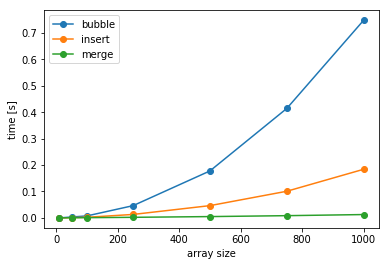

In [14]:
# plot the perfomance metrics

plt.figure()
for method in ["bubble","insert","merge"]:
    plt.plot(sizes,times[method],'o-', label=method)
plt.legend()
plt.xlabel("array size")
plt.ylabel("time [s]")

As you see in the plot above, bubble sort is really quite bad, because it typically has to iterate through the entire array a lot more times than insert sort. Merge sort is the most efficient algorithm.